Similar to my Tigers experiment, I assigned students to be chased by bears. This time, my theory was that the more bears, the faster the students would run. So, use Bears.csv to test my theory with a plot from seaborn.

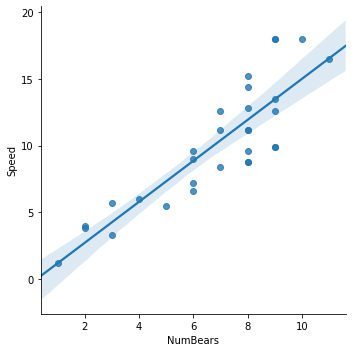

In [5]:
import pandas as pd
dfBears = pd.read_csv("Bears.csv")
dfBears.head()
import seaborn as sns
sns.lmplot(x='NumBears', y = 'Speed', data = dfBears)

In [6]:
dfBears.head()

,CUNY_ID,NumBears,Speed,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,19539,1,1.2,NaN,NaN,NaN
1,99968,2,3.8,NaN,NaN,NaN
2,11759,2,4.0,NaN,NaN,NaN
3,72487,3,3.3,NaN,NaN,NaN
4,70794,3,5.7,NaN,NaN,NaN


Now, bring in StudentsAttend.csv and see if I assigned more bears to students who attended fewer classes.

In [8]:
dfStAt = pd.read_csv("StudentsAttend.csv")
print(dfStAt["Attendance"].mean())
dfStAt.head()

22.566666666666666


,CUNY_ID,FirstName,LastName,Hours_Studied,Attendance
0,63739,Enrique,Riddle,41,25
1,43142,Derick,Huffman,31,24
2,14710,Zain,Mullen,43,15
3,39023,Karissa,Briggs,32,19
4,81382,Chanel,Hoffman,31,24


In [11]:
dfStAt["SplitAttend"] = [1 if columnvalue > 22.5 else -1 for columnvalue in dfStAt['Attendance']]
dfStAt.head()


,CUNY_ID,FirstName,LastName,Hours_Studied,Attendance,SplitAttend
0,63739,Enrique,Riddle,41,25,1
1,43142,Derick,Huffman,31,24,1
2,14710,Zain,Mullen,43,15,-1
3,39023,Karissa,Briggs,32,19,-1
4,81382,Chanel,Hoffman,31,24,1


In [12]:
dfBearsStAt = pd.merge(dfBears, dfStAt, on="CUNY_ID")
dfBearsStAt.head()

,CUNY_ID,NumBears,Speed,Unnamed: 3,Unnamed: 4,Unnamed: 5,FirstName,LastName,Hours_Studied,Attendance,SplitAttend
0,19539,1,1.2,NaN,NaN,NaN,Jazlene,Woodard,46,28,1
1,99968,2,3.8,NaN,NaN,NaN,Layla,Villegas,47,28,1
2,11759,2,4.0,NaN,NaN,NaN,Trevin,Edwards,47,28,1
3,72487,3,3.3,NaN,NaN,NaN,Karson,Richardson,47,27,1
4,70794,3,5.7,NaN,NaN,NaN,Aileen,Jimenez,46,26,1


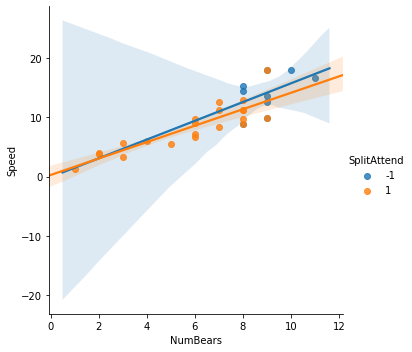

In [14]:
sns.lmplot(x='NumBears', y = 'Speed', data = dfBearsStAt, hue = 'SplitAttend')

Finally, check to see if the relationship between class attendance and number of bears is different for the students with different grades (use StudentsGrades.csv).

In [15]:
dfStG = pd.read_csv("StudentsGrades.csv")
dfStG.head()


,CUNY_ID,FirstName,LastName,Grade,SplitGrade
0,63739,Enrique,Riddle,85,Good Grades
1,43142,Derick,Huffman,77,Bad Grades
2,14710,Zain,Mullen,69,Bad Grades
3,39023,Karissa,Briggs,73,Bad Grades
4,81382,Chanel,Hoffman,79,Bad Grades


In [17]:
dfBearsStG = pd.merge(dfBears, dfStG, on="CUNY_ID")
dfBearsStG.head()

,CUNY_ID,NumBears,Speed,Unnamed: 3,Unnamed: 4,Unnamed: 5,FirstName,LastName,Grade,SplitGrade
0,19539,1,1.2,NaN,NaN,NaN,Jazlene,Woodard,96,Good Grades
1,99968,2,3.8,NaN,NaN,NaN,Layla,Villegas,95,Good Grades
2,11759,2,4.0,NaN,NaN,NaN,Trevin,Edwards,94,Good Grades
3,72487,3,3.3,NaN,NaN,NaN,Karson,Richardson,93,Good Grades
4,70794,3,5.7,NaN,NaN,NaN,Aileen,Jimenez,92,Good Grades


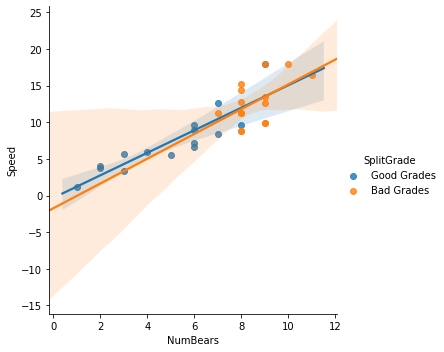

In [18]:
sns.lmplot(x='NumBears', y = 'Speed', data = dfBearsStG, hue = 'SplitGrade')

Now, insert a new column in the dataframe you just used. Call that column "GradePlusHours" and have its value be that of each student's Grade plus their Hours_Studied.

In [19]:
dfBearsStG["GradePlusHours"] = dfBearsStG['Grade'] + dfBearsStAt['Hours_Studied']
dfBearsStG.head()

,CUNY_ID,NumBears,Speed,Unnamed: 3,Unnamed: 4,Unnamed: 5,FirstName,LastName,Grade,SplitGrade,GradePlusHours
0,19539,1,1.2,NaN,NaN,NaN,Jazlene,Woodard,96,Good Grades,142
1,99968,2,3.8,NaN,NaN,NaN,Layla,Villegas,95,Good Grades,142
2,11759,2,4.0,NaN,NaN,NaN,Trevin,Edwards,94,Good Grades,141
3,72487,3,3.3,NaN,NaN,NaN,Karson,Richardson,93,Good Grades,140
4,70794,3,5.7,NaN,NaN,NaN,Aileen,Jimenez,92,Good Grades,138


Last of all, use seaborn to see if there is a relationship between this new value ("GradePlusHours") and Speed

In [20]:
print(dfBearsStG["GradePlusHours"].mean())

119.23333333333333


In [22]:
dfBearsStG["SplitGradePlusHours"] = [1 if columnvalue > 119 else -1 for columnvalue in dfBearsStG['GradePlusHours']]
dfBearsStG.head()

,CUNY_ID,NumBears,Speed,Unnamed: 3,Unnamed: 4,Unnamed: 5,FirstName,LastName,Grade,SplitGrade,GradePlusHours,SplitGradePlusHours
0,19539,1,1.2,NaN,NaN,NaN,Jazlene,Woodard,96,Good Grades,142,1
1,99968,2,3.8,NaN,NaN,NaN,Layla,Villegas,95,Good Grades,142,1
2,11759,2,4.0,NaN,NaN,NaN,Trevin,Edwards,94,Good Grades,141,1
3,72487,3,3.3,NaN,NaN,NaN,Karson,Richardson,93,Good Grades,140,1
4,70794,3,5.7,NaN,NaN,NaN,Aileen,Jimenez,92,Good Grades,138,1


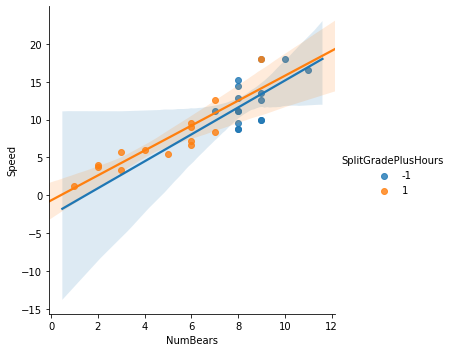

In [23]:
sns.lmplot(x='NumBears', y = 'Speed', data = dfBearsStG, hue = 'SplitGradePlusHours')